In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

def FitLineal(x, y, s=None, graf=False, filename=None):
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]

    # Cálculo de R^2
    y_pred = m * x + c
    ss_res = np.sum((y - y_pred) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    R2 = 1 - (ss_res / ss_tot)

    if graf:
        plt.figure()
        plt.scatter(x, y, color='red', label='Datos')
        plt.plot(x, y_pred, 'b-', label=f'Ajuste lineal (R²={R2:.4f})')
        if s is not None:
            plt.fill_between(x, y_pred - s, y_pred + s, color='blue', alpha=0.2, label='Error')

        plt.title('Ajuste Lineal de Mínimos Cuadrados')
        plt.xlabel(r'$R^2$ (cm$^2$)')
        plt.ylabel(r'$\theta$ ángulo corregido (grados)')
        plt.legend()
        plt.grid(True)

        # Guardar la gráfica si se proporciona un nombre de archivo
        if filename:
            os.makedirs("Graficas", exist_ok=True)
            plt.savefig(os.path.join("Graficas", filename), dpi=300, bbox_inches='tight')

        plt.show()

    return m, c, R2



In [3]:
def FitCuadratico(x, y, s=None, graf=False, filename=None):
    A = np.vstack([x**2, x, np.ones(len(x))]).T
    a, b, c = np.linalg.lstsq(A, y, rcond=None)[0]

    # Cálculo de R^2
    y_pred = a * x**2 + b * x + c
    ss_res = np.sum((y - y_pred) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    R2 = 1 - (ss_res / ss_tot)

    if graf:
        plt.figure()
        x_fit = np.linspace(min(x), max(x), 100)
        y_fit = a * x_fit**2 + b * x_fit + c

        plt.scatter(x**2, y, color='red', label='Datos')
        plt.plot(x_fit**2, a * x_fit**2 + b * x_fit + c, 'b-', label=f'Ajuste cuadrático (R²={R2:.4f})')
        if s is not None:
            plt.fill_between(x_fit**2, y_fit - s, y_fit + s, color='blue', alpha=0.2, label='Error')

        plt.title('Ajuste Cuadrático de Mínimos Cuadrados')
        plt.xlabel(r'$R$ distancia entre esferas (cm)')
        plt.ylabel(r'$\theta$ ángulo corregido (grados)')
        plt.legend()
        plt.grid(True)

        # Guardar la gráfica si se proporciona un nombre de archivo
        if filename:
            os.makedirs("Graficas", exist_ok=True)
            plt.savefig(os.path.join("Graficas", filename), dpi=300, bbox_inches='tight')

        plt.show()

    return a, b, c, R2



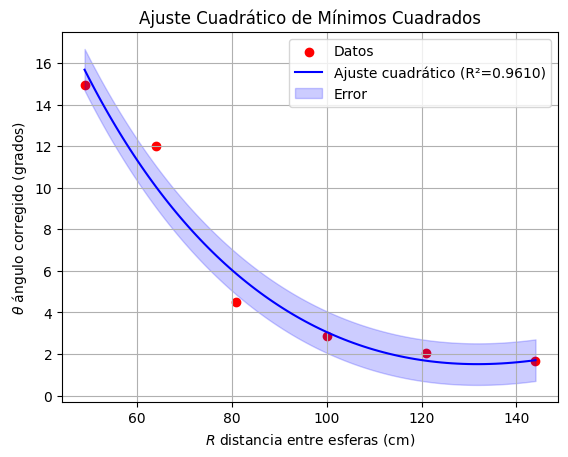

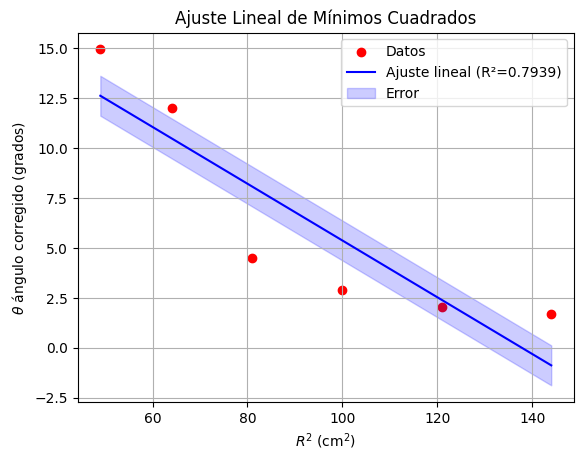

(-0.14208114689606327, 19.57384518581656, 0.7939265892649876)

In [4]:
r = np.array([7.,8.,9.,10.,11.,12.])
theta = np.array([14.9363, 11.9974, 4.5, 2.8774, 2.0315, 1.67711])
r2 = np.array([49., 64., 81., 100., 121., 144.])

FitCuadratico(r,theta,1,graf=True, filename="grafica1")

FitLineal(r2, theta, 1 ,graf=True, filename="grafica2")